# ARTIFICIAL NEURAL NETWORK

### Nama : Alifah Fidela
### Nim : 09011281823039
### Kelas : SK5B


Pada program kali ini menerapkan artificial intelegencia untuk menentukan hasil akurasi dari dataset yang digunakan. Dataset yang digunakan untuk mengklasifikasikan suara sebagai laki-laki atau perempuan.Pada dataset terdapat 3.168 sampel suara yang direkam. Bersumber dari : https://www.kaggle.com/siddu1998/artificial-neural-network-to-classify-voice

### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from keras.utils import plot_model
from keras.optimizers import SGD

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics

Using TensorFlow backend.


### Read Dataset

In [2]:
dataset=pd.read_csv("E:/SEMESTER 5/TUGAS UTS/artificial-neural-network-to-classify-voice/voice.csv")
X=dataset.iloc[:,0:20]
y=dataset.iloc[:,-1].values
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Pada proses diatas yaitu memisahkan : 
- variabel dependen yaitu x
- variabel independen yaitu y

Dilakukan dengan cara slicing

terdapat 5 baris dan 21 kolom, pada kolom pertama yaitu fitur dan kolom terakhir yaitu variabel dependen yang terdapat nilai string. Terdapat values yang akan mengembalikan numpy array. Tanpa values, iloc akan mengembalikan obyek DataFrame.

### Label Encoding

In [3]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

### Feature Scaling

In [4]:
X_sc = StandardScaler()
X= X_sc.fit_transform(X)

Dilakukan scaling data karena jika variabel atau nilai yang ada memiliki skala yang berbeda dan nilai yang sangat dekat dengan 0 akan mengalami masalah. Maka menggunakan StandarScaler ini akan menghilangkan mean atau terpusat pada 0 dan menskalakan ke variansi yaitu deviasi standarnya 1.

### Train dan Test

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


pada perintah diatas yaitu akan membagi data yang akan di train dan test.Train yaitu dataset yang dilatih yang akan digunakan untuk membuat prediksi. Sedangkan test yaitu dataset yang akan diuji untuk melihat hasil akurasi.

definisi yang ada pada fungsi diatas :
- x_train yaitu data x yang akan dilatih
- x_test yaitu data x yang akan di uji
- y_train yaitu variabel dependen yang akan dilatih
- y_test yaitu variabel dependen yang akan di uji


- Digunakan data test sebesar 20% 
- Digunakan random number generator sebesar 0

In [6]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2534, 20), (634, 20), (2534,), (634,))

Setelah ditrain dan ditest kita akan menampilkan hasilnya seperti pada data diatas.

### Classifier 

In [7]:
classifier=Sequential()
history = History()

#number of input variables =20
#first layer 
#input_dim is only for the first layer
classifier.add(Dense(units=11,kernel_initializer='uniform',activation='relu',input_dim=20))
#first Hidden layer
classifier.add(Dense(units=11,kernel_initializer='uniform',activation='relu'))
#Second Hidden
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
#output layer
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
#Running the artificial neural network
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#fitting
classifier.fit(X_train,y_train,batch_size=10,epochs=10,validation_split=0.1,callbacks=[history],shuffle=2)


Train on 2280 samples, validate on 254 samples
Epoch 1/10
2280/2280 [==============================] - 1s 368us/step - loss: 0.5346 - accuracy: 0.8123 - val_loss: 0.3677 - val_accuracy: 0.8858
Epoch 2/10
2280/2280 [==============================] - 1s 275us/step - loss: 0.2655 - accuracy: 0.9145 - val_loss: 0.2133 - val_accuracy: 0.9173
Epoch 3/10
2280/2280 [==============================] - 1s 259us/step - loss: 0.1515 - accuracy: 0.9583 - val_loss: 0.1548 - val_accuracy: 0.9409
Epoch 4/10
2280/2280 [==============================] - 1s 262us/step - loss: 0.1076 - accuracy: 0.9684 - val_loss: 0.1252 - val_accuracy: 0.9646
Epoch 5/10
2280/2280 [==============================] - 1s 273us/step - loss: 0.0908 - accuracy: 0.9737 - val_loss: 0.1252 - val_accuracy: 0.9646
Epoch 6/10
2280/2280 [==============================] - 1s 261us/step - loss: 0.0840 - accuracy: 0.9754 - val_loss: 0.1195 - val_accuracy: 0.9646
Epoch 7/10
2280/2280 [==============================] - 1s 269us/step - loss:

Dilakukan pengklasifikasi dan validasi pada data.
Relu dan sigmoid yaitu fungsi yang digunakan untuk menghitung kerugiaan dan bobot. 

### Accuracy

In [8]:
y_pred=classifier.predict(X_test)
y_pred = np.round(y_pred)

print('Accuracy we are able to achieve with our ANN is',metrics.accuracy_score(y_pred,y_test)*100,'%')


Accuracy we are able to achieve with our ANN is 97.47634069400631 %


Hasil akurasi data menggunakan artificial neural network sebesar 97 %. Dari grafik kita dapat melihat bahwa loss yang terjadi secara bertahap sampai ke nol dan akurasi meningkat pada tingkat yang cukup besar 

### Graph

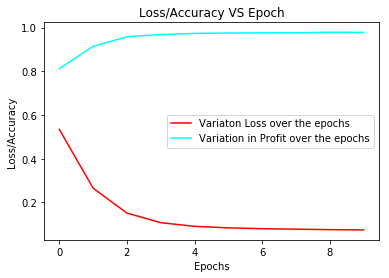

In [9]:
plt.plot(history.history['loss'], color = 'red',label='Variaton Loss over the epochs',)
plt.plot(history.history['accuracy'],color='cyan',label='Variation in Profit over the epochs')

plt.xlabel('Epochs')
plt.title('Loss/Accuracy VS Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='best')
plt.show()

Dari grafik kita dapat melihat bahwa loss yang terjadi secara bertahap sampai ke nol dan akurasi meningkat pada tingkat yang cukup besar 